In [1]:
# initialization for my classroom
import os
from datetime import datetime as dt

def logfile(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    prefix='/srv'
    if os.path.isdir(prefix) and os.access(prefix, os.W_OK):
        prefix+=('/'+user)
        if not os.path.isdir(prefix):
            os.makedirs(prefix)
    else:
        prefix='.'
    return prefix+'/'+dt.now().strftime('%Y%m%d')+'-nbg.log'
    #return prefix+'/'+'20220516'+'-nbg.log'

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import datetime

In [3]:
import re

pat = re.compile(r'(\d{4})-(\d{2})-(\d{2}) (\d{2}):(\d{2}):(\d{2}).*:summary: \((\d+), (\d+), (\d+)\)')

def activity(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    df = pd.DataFrame()
    try:
        with open(logfile(user), 'r') as f:
            for l in f:
                r = pat.search(l)
                if r:
                    dy, dm, dd, th, tm, ts, c, p, f = (int(s) for s in r.groups())
                    d = dt.combine(datetime.date(dy, dm, dd),
                                   datetime.time(th, tm, ts))
                    #print(pd.Timestamp(d), c, p, f)
                    if (int(p)+int(f))> 0:
                        df_new = pd.DataFrame([[1.,(3*p+f)/(p+f)]], 
                                              columns=["y", "pass"],
                                              index=[pd.Timestamp(d)])
                        df = pd.concat([df,pd.DataFrame(df_new)])
    except:
        pass
    return df

In [4]:
df = activity()
df

""


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

def plot_ax(ax, user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    data = activity(user).sort_index()
    if len(data)>0:
        cmap = plt.cm.Spectral
        ax.scatter(
            x=data.index, y=data['y'].values, 
            c=data['pass'].values, s=data['pass'].values*500,
            cmap='Spectral',
            alpha=0.4, edgecolor='none'
        )
    ax.set_ylabel(user, rotation=0, ha="right", va="center")
    #ax.set_ylabel('jovyan', rotation=0, ha="right", va="center")

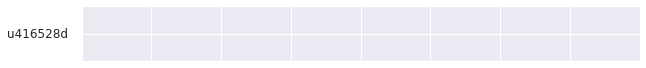

In [12]:
from datetime import date
from datetime import time

fig = plt.figure(figsize=(10,1))
ax = fig.add_subplot(1,1,1)

plt.setp(ax, xlim=(pd.Timestamp(dt.combine(date.today(),time(dt.now().hour-3,))), 
                   pd.Timestamp(dt.combine(date.today(),time(dt.now().hour,59,59)))))
plt.setp(ax, ylim=(0,2))
plt.setp(ax, xticklabels=[])
plt.setp(ax, yticklabels=[])
plot_ax(ax)

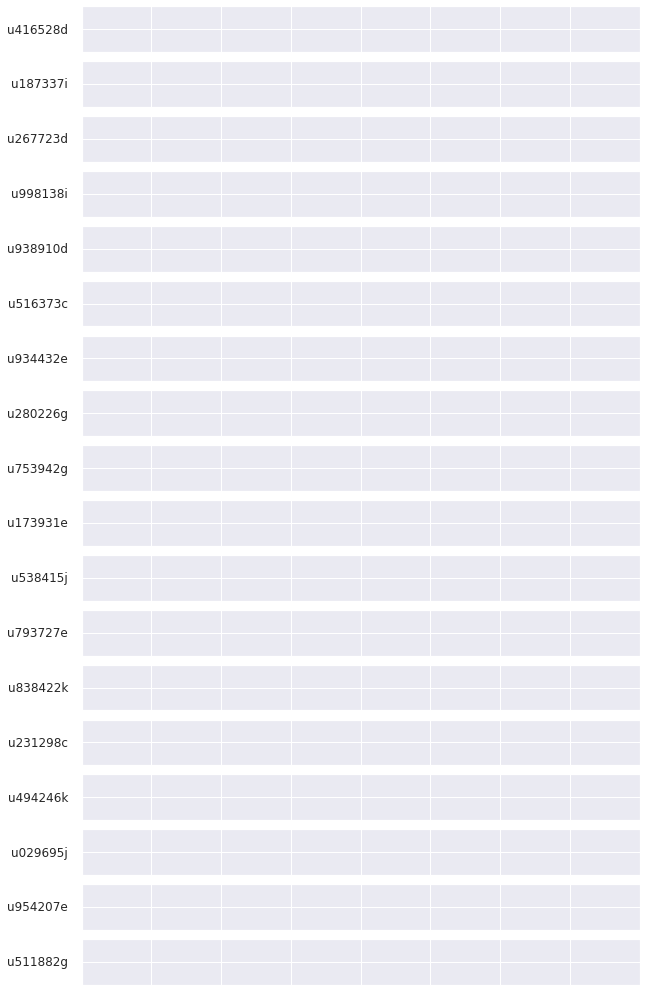

In [11]:
ids='''
u416528d
u187337i
u267723d
u998138i
u938910d
u516373c
u934432e
u280226g
u753942g
u173931e
u538415j
u793727e
u838422k
u231298c
u494246k
u029695j
u954207e
u511882g
'''
users=ids.strip().splitlines()

fig, axes = plt.subplots(len(users),1,figsize=(10,len(users)))

plt.setp(axes, xlim=(pd.Timestamp(dt.combine(date.today(),time(dt.now().hour-1,0))), 
                     pd.Timestamp(dt.combine(date.today(),time(dt.now().hour-0,59,59)))))
plt.setp(axes, ylim=(0,2))
plt.setp(axes, xticklabels=[])
plt.setp(axes, yticklabels=[])

for i in range(len(users)):
    #print(users[i])
    plot_ax(axes[i], users[i])
    #display.display(plt.gcf())